# Feature importance and selection

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from featimp import *

import warnings
warnings.filterwarnings("ignore")

%run featimp

The document contains information about exloration of feature importance algorithms and how to select features in a model. More specifically this document will include the following:

* What is feature importance?
* Why feature importance is useful?
* Spearman's rank correlation coefficient
* Principle Component Analysis (PCA)
* Model-based feature importance
    * Drop column importance
    * Permutation importance
* Comparing Strategies
* Conclusions

## What is feature importance? 

With help of packages and tools availble, we are able to build a machine learning model easily. But building good and efficient machine learning model is more than packages and tools.
In the process of building a good model, we must select appropriate features. Useless features results in bias that lower the model's performance. 

Feature Importance is techiniques that compute a score that measures the importance of the input features. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

## Why feature importance is useful? 

1. Feature importance enable us to understand the relationship between the features and the target variable. And it helps us understand what features are irrelevant for the model.
2. Measuring features' performance with score, we are able to reduce the model complexity and speeds up training process, ultimately improving the performance of the model.
3. Feature Importance is also used for interpreting and communicating your model to other stakeholders. Comparing scores of different features, we are able to determine which features are the most predictive to the model.

## Spearman's rank correlation coefficient

1. The Spearman rank correlation coefficient is the simpliest technique to identify important regression features. It is a more general monotonic metric used to quantify the relationship between each feature and the response.
3. The feature with the largest coefficient is taken to be the most important. 
4. This method is measuring single-feature relevance importance and works well for independent features

However, 
1. The method suffers in the presence of codependent features. Groups of features with similar relationships to the response variable receive the same or similar ranks, even though just one should be considered important.

In this document, we are going to focus on the dataset 'load_boston' from UCI

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [3]:
spear_imp = spearCorr(X, y)

By ranking the feature based on the spearman's rank correlation coefficient, we have the following plot.

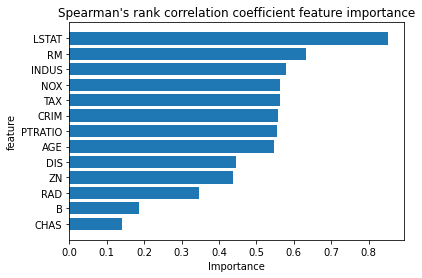

In [4]:
plt.barh(spear_imp.index.values[::-1], spear_imp['correlation'][::-1])
plt.title('Spearman\'s rank correlation coefficient feature importance')
plt.ylabel('feature')
plt.xlabel('Importance')
plt.show()

## Principle Component Analysis (PCA)

PCA commonly used for reducing the dimensionality of data while preserving most of the variance among the data points.  
It identifies features that explain the most variance in the new space. This transformation is defined in such a way that the first principal component has the largest possible variance and each succeeding component, in turn, has the highest possible variance possible. If the first principal component covers a large percentage of the variance, the 'loads' in the original space that corresponding to the component can indicate importance of features.

**Advantages:**
- It helps to get rid of correlated features. After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them.
- By removing correlated variables that don't have predictive power, it improves training time of algorithm with less number of features and also prevent overfitting by reducing number of features.

**Disadvantage:**
- Although pricipal components covers most of variance among the features, it may miss some information as compared to the original list of features.

As we see below, the first principal component (PC1) explains the most variance in the original dataset, this means that features that correlate with PC1 contribute to a large amount of variance in the data.

Since PC1 covers large ratio of variance, its corresponding features would be important.

In [5]:
pca_comp_df, pca_ratio_df, pca_fea_importance_df = pca_imp(X, y)
pca_ratio_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
explained_variance_ratio_,0.471296,0.110252,0.095586,0.065967,0.064217,0.05057,0.041181,0.030469,0.021303


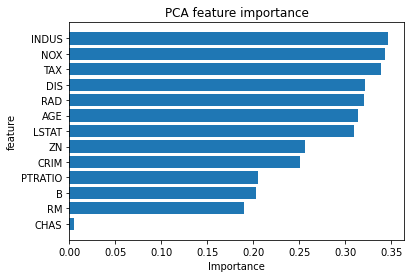

In [6]:
plt.barh(pca_fea_importance_df.index.values[::-1], pca_fea_importance_df['scores'][::-1])
plt.title('PCA feature importance')
plt.ylabel('feature')
plt.xlabel('Importance')
plt.show()


Also fro the heatmap, we can find the feature 'CHAS' in the PC1 are the least importance compared to others

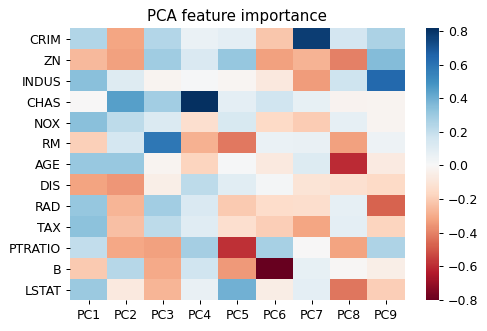

In [7]:
pca_heatmap(pca_comp_df)

## Model-based feature importance

We will explore the two Permutation importance and Drop column importance in this document.


### Drop column importance

It is brute force mechanism to examine importance of any feature or combination of features in the dataset. 

The steps are generalized below:
1. Compute validation metric for model trained on all features a baseline performance score
2. Drop a column from training set
3. Retrain the model
4. Recompute the validation metric set (performance score)
5. The importance value of a feature is the difference between the baseline and the score from the model missing that feature.

This strategy answers the question of how loss of a feature affects overall model performance.

We are going to implement the algorithm below and list important features in descending order.

In [8]:
drop_col_imp = drop_col_importances(X, y)

From the bar plot below, it indicates that 'LSTAT' are the most predictive feature, followed by 'RM', 'DIS' and 'NOX' and so on.  

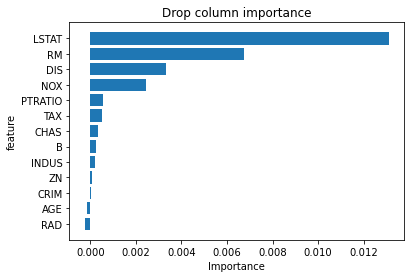

In [9]:
plt.barh(drop_col_imp.index.values[::-1], drop_col_imp.values.flatten()[::-1])
plt.title('Drop column importance')
plt.ylabel('feature')
plt.xlabel('Importance')
plt.show()

**Advantage:**
- It is simple to understand and implement, very direct means of measuring feature importance. 
- It works for any machine learning model.

**Disvantage:**
- If there are p features, we will retrain the model p time. That is very expensive
- Codependent features often result in 0 or very low importance


### Permutation importance

Compared to Drop column importance, Permutation importance does not require to retrain model for every feature. 

The steps are generalized below:
1. Compute validation metric for model trained on all features a baseline performance score.
2. Permute the column values of a single predictor feature.
3. Pass all test samples back through the Random Forest and recompute validation metric set.
4. The importance of that feature is the difference between the baseline and the drop in overall metric caused by permuting the column.

We are going to implement the algorithm below and list important features in descending order.

From the bar plot below, the first two features 'RM' and 'LSTAT' are the most predictive features compared to others. The first two features matched to the ones in the drop column importance.

In [10]:
permute_imp = permute_importances(X, y)

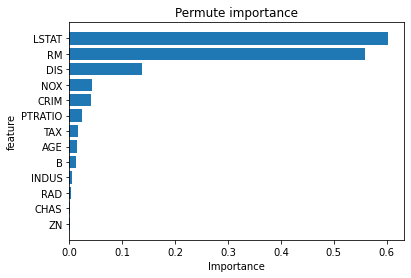

In [11]:
plt.barh(permute_imp.index.values[::-1], permute_imp.values.flatten()[::-1])
plt.title('Permute importance')
plt.ylabel('feature')
plt.xlabel('Importance')
plt.show()

**Advantage:**
- It is simple to understand and implement, very direct means of measuring feature importance. 
- It works for any machine learning model.
- It does not require to retrain the model so much compared to drop column importance

**Disvantage:**
- It can create nonsensical records through permutation, such as pregnant male, which makes the results suspect
- Codependent features often share similar feature importance. 

## Comparing Strategies

With strategies mentioned above, it is still diffcult to decide which features are most important and how we select the top k features to fit model. One way is to compare the model performance with recommended features. We firstly train a model given a feature ranking and compare its performance metric. 


Below is feature importance computed by shap using xgboost

In [12]:
shap_values, shap_imp = shap_importances(X, y)

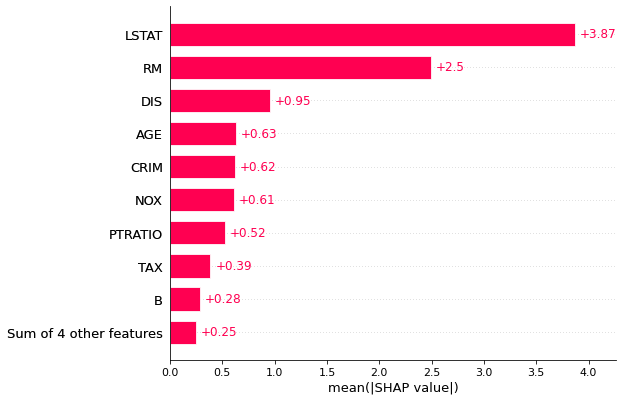

In [13]:
# visualize the first prediction's explanation
shap.plots.bar(shap_values)

Here we are going to input ordered features recommended by shap, spearman rank correlation coefficient, permute and drop column importance into the random forest model, and evaluate the performance based on MSE.

In [14]:
# compute MSE
shap_mse = validation_test(shap_imp.index.values, X, y)
spear_mse= validation_test(spear_imp.index.values, X, y)
permute_mse = validation_test(permute_imp.index.values, X, y)
drop_col_mse = validation_test(drop_col_imp.index.values, X, y)

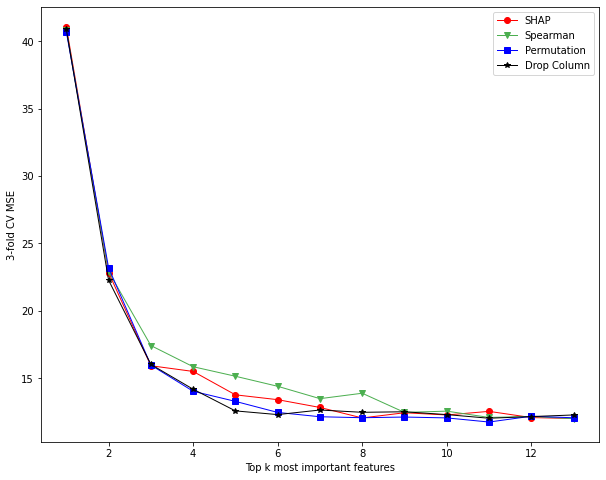

In [15]:
# plot MSE
x_idx = [i+1 for i in range(len(X.columns))]
plt.figure(figsize=(10,8))

plt.plot(x_idx, shap_mse, label='SHAP', color="r", linewidth=1, marker='o')
plt.plot(x_idx, spear_mse, label='Spearman', color="#4CAF50", linewidth=1, marker='v')
plt.plot(x_idx, permute_mse, label='Permutation', color="blue", linewidth=1, marker='s')
plt.plot(x_idx, drop_col_mse, label='Drop Column', color="black", linewidth=1, marker='*')
plt.xlabel('Top k most important features')
plt.ylabel('3-fold CV MSE')
plt.legend()
plt.show()

As these feature importance algorithms give us the silimar feature ranking at the beginning, all the plot lines ovelapped for the first two important features. After that, they have different feature importance.

## Automatic feature selection algorithm

Given ordered features from the most to least important, we need to select top k features that contribute in the decision making and drop off those unimportant features. This can be achieved by implementing an automated mechanism that selects the top k features based on the validation error. 

Basic steps are generalized below:
1. Compute validation metric for model trained on all features a baseline performance score
2. Get the feature importances.
3. Dropped the lowest importance feature
4. Retrain the model
5. Re-computing the validation metric. 
6. If the validation metric is worse, then we have dropped too many features.
7. Get the feature importances again.

We are going to implement the algorithm above using shap feature importance, xgboost and 3-fold cross validation.

In [19]:
feature_selected = auto_selection(shap_imp.index.values, X, y)

Previous feature MSE: 11.945
Drop the least important feature: CHAS
Re-compute MSE: 11.907
Previous feature MSE: 11.907
Drop the least important feature: ZN
Re-compute MSE: 11.701
Previous feature MSE: 11.701
Drop the least important feature: RAD
Re-compute MSE: 12.011


In [20]:
feature_selected

['CRIM',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'RAD']

From the output above, it suggests that both features 'CHAS' and 'ZN' are the least important. If we drop these two features, MSE decreases.

## Conclusions

1. PCA algorithm help remove correlated features to reduce model complexity and improve performance. 
2. Any model works for the drop column and permutation importance.
3. Even though different feature importance algorithms have a different ranking, they may have the same important features.